In [10]:
import xgboost as xgb
from sklearn.model_selection import KFold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'HousePrices'

In [388]:
d = 'train'
data = pd.read_csv(f'../derivedData/{d}_cleaned.csv')

data['logSalePrice'] = np.log(data['SalePrice'])

X = data_train.iloc[:, :-1]

X = X.loc[:,X.columns != 'SalePrice']

# SalePrice
y = data_train['SalePrice']

# log SalePrice
y = data.iloc[:, -1]

## XGBoost

In [425]:
kf = KFold(n_splits=4, shuffle=True)

xgb_model = xgb.XGBRegressor(random_state=10, colsample_bytree=0.5,
                            gamma=0.05, learning_rate=0.05,
                            max_depth=2, n_estimators=500)

# xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

reg_range = np.linspace(0, 10, 20)

reg_train_score = []
reg_test_score = []

for reg_ in reg_range:
    # Model score
    train_score = 0
    test_score = 0

    # Reg_lambda is the L2 regularization
    xgb_model.set_params(reg_alpha = reg_)

    train_score = 0
    test_score = 0

    for train_index, test_index in kf.split(X, y) :
        xgb_model.fit(X.iloc[train_index,:], y[train_index])
        train_score = train_score + xgb_model.score(X.iloc[train_index,:], y[train_index])
        test_score = test_score + xgb_model.score(X.iloc[test_index,:], y[test_index])
        
    train_score = train_score/kf.n_splits
    test_score = test_score/kf.n_splits
    
    # Storing score per reg
    reg_train_score.append(train_score)
    reg_test_score.append(test_score)

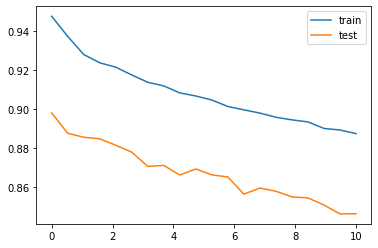

In [426]:
plt.plot(reg_range, reg_train_score, label='train')
plt.plot(reg_range, reg_test_score, label='test')
plt.legend(loc=1)

In [396]:
# Model score
train_score = 0
test_score = 0

# Reg_lambda is the L2 regularization
# xgb_model.set_params(reg_lambda = 1000)

xgb_model = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

for train_index, test_index in kf.split(X, y) :
    xgb_model.fit(X.iloc[train_index,:], y[train_index])
    train_score = train_score + xgb_model.score(X.iloc[train_index,:], y[train_index])
    test_score = test_score + xgb_model.score(X.iloc[test_index,:], y[test_index])

train_score = train_score/kf.n_splits
test_score = test_score/kf.n_splits

print(f'Train score is {train_score}')
print(f'Test score is {test_score}')

[19:52:56] WARNING: /home/dantole/xgboost/python-package/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:485: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:53:35] WARNING: /home/dantole/xgboost/python-package/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:485: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:54:18] WARNING: /home/dantole/xgboost/python-package/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:485: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters a

In [16]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time
from ModelScore import model_score

logprice = True

d = 'train'
data = pd.read_csv(f'../derivedData/{d}_cleaned.csv')

data['logSalePrice'] = np.log(data['SalePrice'])

X = data.iloc[:, :-1]

X = X.loc[:, X.columns != 'SalePrice']

if not logprice:
    y = data['SalePrice']
else:
    y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)

kf = KFold(n_splits=4, shuffle=True)

xgboost = xgb.XGBRegressor(booster='gblinear')

xgb_param = [
    {'alpha': np.linspace(0, 100, 50)},
    {'lambda': np.linspace(0, 100, 50)}
]

grid_search_xgb = GridSearchCV(xgboost, xgb_param, cv=4)

start = time.time()
for train_index, test_index in kf.split(X_train, y_train):
    grid_search_xgb.fit(X_train.iloc[train_index, :], y_train[train_index])
end = time.time()

print(f'Time taken: {end - start}')
print('Best parameters: ' + str(grid_search_xgb.best_params_))

model_score(grid_search_xgb.best_estimator_, X_test, y_test, saves=False)


ModuleNotFoundError: No module named 'HousePrices'